# Anlysis for figure S10

## imports & installations

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sys
import os

warnings.simplefilter('ignore', pd.errors.DtypeWarning)
warnings.simplefilter("ignore")

sys.path.append(os.path.abspath('../..'))

import analysis.calc_single_cell_properties as calculator 
import analysis.calc_auc_over_time as auc_calculator 
import analysis.utils as utils
import data_layer.utils as data_utils
import model_layer.utils as model_utils
from configuration import consts, params

## data loading - differentiation scores dataframes

In [2]:
scores_file_name = r"/df_score_vid_num_S3.pkl"
df_score_dif_mot = pickle.load(open(consts.motility_model_path % (1,5) +  scores_file_name, 'rb'))
df_score_dif_int = pickle.load(open(consts.intensity_model_path % (1,5) +  scores_file_name, 'rb'))

score_dif_local_den = pickle.load(open(consts.local_density_models_path + "/24-01-2023-local_density local dens-False, s1, s5 train win size 16/track len 30, impute_func-ImputeAllData_impute_zeroes reg MeanOpticalFlowReg_" + scores_file_name, 'rb'))
score_dif_local_den_int = pickle.load(open(consts.local_density_models_path + "/24-01-2023-actin_intensity-local_density local dens-False, s1, s5 train win size 16/track len 30, impute_func-ImputeAllData_impute_zeroes reg MeanOpticalFlowReg_" + scores_file_name, 'rb'))
score_dif_local_den_mot = pickle.load(open(consts.local_density_models_path + "/24-01-2023-motility-local_density local dens-False, s1, s5 train win size 16/track len 30, impute_func-ImputeAllData_impute_zeroes reg MeanOpticalFlowReg_" +scores_file_name, 'rb'))

local density - median:  0.09 size of data:  675
local density int - median:  0.57 size of data:  675
intensity - median:  0.7 size of data:  675
local density mot - median:  0.51 size of data:  675
motility - median:  0.51 size of data:  675


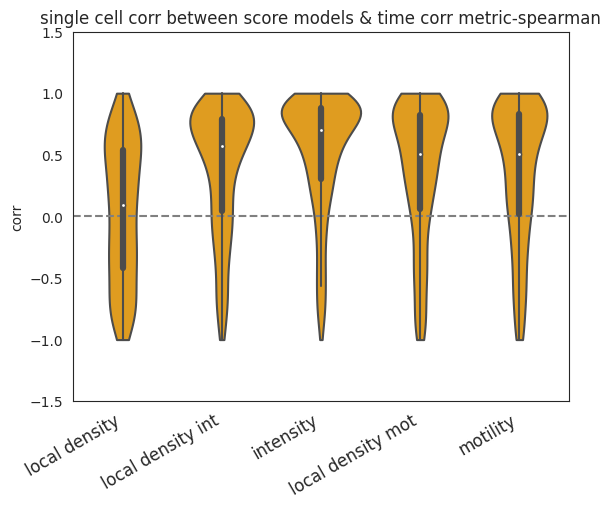

In [9]:
utils.plot_violin_spearman_corr([score_dif_local_den, score_dif_local_den_int, df_score_dif_int, score_dif_local_den_mot, df_score_dif_mot], 
               ["local density", "local density int", "intensity", "local density mot", "motility"], 
               fig_name = "single cell correlation time & score local density compare",
               color="orange", corr_metric="spearman", time=(6,13))

In [34]:
from scipy.stats import wilcoxon
from scipy.stats import ranksums

def test_Wilcoxon(series_a, series_b, modality_a, modality_b):
    series_a = data_utils.convert_score_df(series_a, modality_a)
    series_b = data_utils.convert_score_df(series_b, modality_b)
    
    print("# of cells in the analysis: ", series_a["Spot track ID"].nunique())
    
    corr_a = utils.get_correlation_coefficients(series_a, (6,13), f"score_{modality_a}", "time", rolling_w=1, corr_metric="spearman")
    corr_b = utils.get_correlation_coefficients(series_b, (6,13), f"score_{modality_b}", "time", rolling_w=1, corr_metric="spearman")
    delta = corr_a - corr_b
    delta = np.sort(delta)
    plt.hist(delta)    
    res = wilcoxon(corr_a, corr_b, alternative="greater", nan_policy='omit')
    return res.statistic, res.pvalue

# of cells in the analysis:  675


(120320.0, 4.778176194265578e-19)

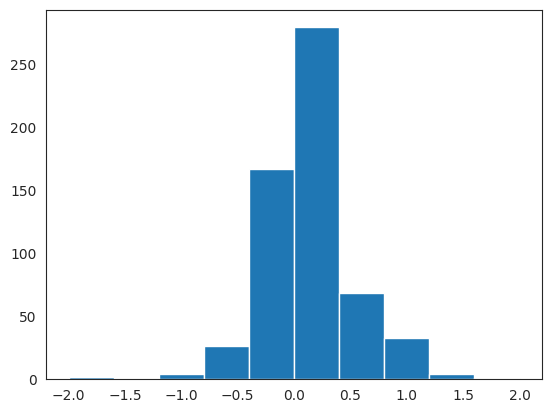

In [35]:
statistic, pvalue = test_Wilcoxon(df_score_dif_int, score_dif_local_den_int, "intensity", "local density int")
statistic, pvalue

# of cells in the analysis:  675


(83577.5, 0.6733631152046483)

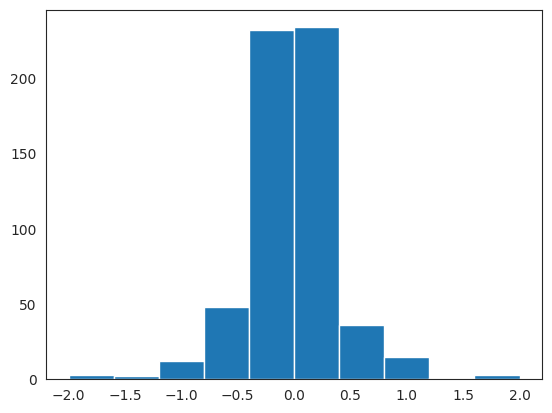

In [36]:
statistic, pvalue = test_Wilcoxon(df_score_dif_mot, score_dif_local_den_mot, "motility", "local density mot")
statistic, pvalue